In [2]:
using PyCall

using DrWatson
quickactivate(@__DIR__)

include(projectdir("scripts", "notebooks_netsense_funs.jl"))

show_res (generic function with 1 method)

In [3]:
fname = datadir("exp_pro", "NetSense_network.pkl")
file = load_pickle(fname)

Dict{Any, Any} with 6 entries:
  5 => PyObject <networkx.classes.graph.Graph object at 0x7fbd0a6255e0>
  4 => PyObject <networkx.classes.graph.Graph object at 0x7fbd0a66a9a0>
  6 => PyObject <networkx.classes.graph.Graph object at 0x7fbd0a5e78e0>
  2 => PyObject <networkx.classes.graph.Graph object at 0x7fbd0a6e6100>
  3 => PyObject <networkx.classes.graph.Graph object at 0x7fbd0a6add00>
  1 => PyObject <networkx.classes.graph.Graph object at 0x7fbd20b77400>

In [4]:
get_triads = py"get_triads"
get_adjacency_matrix = py"get_adjacency_matrix"

PyObject <function get_adjacency_matrix at 0x7fbd20b6e430>

In [5]:
nodes = get_all_nodes(file)
Ws = create_series_adj_mat(file, nodes)
As = [sign.(W) for W in Ws]

i=1; inc = 1;
display((sum(abs.(As[i + inc] .- As[i]))/2, sum(As[i])/2, sum(As[i+inc])/2))

overlap = zeros(6,6)
for i in 1:6, j in 1:6
    overlap[i,j] = sum(As[i].*As[j]) / sum(sign.(As[i] .+ As[j]))
end
display(overlap)

#how many links vanish?
not_vanish = zeros(6,6)
vanish_abs = zeros(6,6)
for i in 1:6
    for j in i:6
        not_vanish[i,j] = sum(As[i].*As[j]) / sum(As[i])
        vanish_abs[i,j] = (sum(As[i]) - sum(As[i].*As[j]))/2
    end
end
display(not_vanish)
display(vanish_abs)


(108.0, 152.0, 116.0)

6×6 Matrix{Float64}:
 1.0       0.425532  0.260355  0.318182  0.258706  0.255682
 0.425532  1.0       0.427419  0.530612  0.466216  0.350365
 0.260355  0.427419  1.0       0.478261  0.421053  0.397849
 0.318182  0.530612  0.478261  1.0       0.578947  0.401575
 0.258706  0.466216  0.421053  0.578947  1.0       0.491228
 0.255682  0.350365  0.397849  0.401575  0.491228  1.0

6×6 Matrix{Float64}:
 1.0  0.526316  0.289474  0.414474  0.342105  0.296053
 0.0  1.0       0.456897  0.672414  0.594828  0.413793
 0.0  0.0       1.0       0.901639  0.786885  0.606557
 0.0  0.0       0.0       1.0       0.706422  0.46789
 0.0  0.0       0.0       0.0       1.0       0.554455
 0.0  0.0       0.0       0.0       0.0       1.0

6×6 Matrix{Float64}:
 0.0  72.0  108.0  89.0  100.0  107.0
 0.0   0.0   63.0  38.0   47.0   68.0
 0.0   0.0    0.0   6.0   13.0   24.0
 0.0   0.0    0.0   0.0   32.0   58.0
 0.0   0.0    0.0   0.0    0.0   45.0
 0.0   0.0    0.0   0.0    0.0    0.0

In [6]:
all_wedges = []
all_singles = []
for i in 1:6
    wedges, single_edges = get_wedges_single_edges(As[i])
    push!(all_wedges, wedges)
    push!(all_singles, single_edges)
end

In [7]:
# test
triad_appear2, triad_appear_wedges2, triad_appear_single2, triad_appear_nowhere2 = understand_triad_apperance(As)


([0.0 9.0 … 10.0 7.0; 0.0 0.0 … 8.0 6.0; … ; 0.0 0.0 … 0.0 2.0; 0.0 0.0 … 0.0 0.0], [0.0 8.0 … 5.0 4.0; 0.0 0.0 … 5.0 3.0; … ; 0.0 0.0 … 0.0 2.0; 0.0 0.0 … 0.0 0.0], [0.0 1.0 … 4.0 2.0; 0.0 0.0 … 3.0 2.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 1.0 1.0; 0.0 0.0 … 0.0 1.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

In [8]:
#creating list of attributes
list_of_attributes = [k for n in file[1].nodes for k in keys(file[1].nodes[n+1])]
sort!(list_of_attributes)

# creating possible attribute values
attribute_values = Dict((attribute, Set() ) for attribute in list_of_attributes)

for sem in 1:6
    for node in file[sem].nodes()
        for attribute in list_of_attributes
            push!(attribute_values[attribute], convert(Int, file[sem].nodes[node + 1][attribute]))
        end
    end
end

attribute_values

#To apply PCA or other analysis on all attributes (i.e. including ethnicity) 
#one would have to create an attribute for each race, that is is_1, is_2 etc. 
#Because this attribute is not ordered. 

Dict{String, Set{Any}} with 12 entries:
  "abortion_"      => Set([2, 3, 1])
  "premaritalsex_" => Set([2, 3, 1])
  "homosexual_"    => Set([2, 3, 1])
  "gender_1"       => Set([2, 1])
  "marijuana_"     => Set([2, 3, 1])
  "euthanasia_"    => Set([2, 3, 1])
  "gaymarriage_"   => Set([2, 3, 1])
  "age_1"          => Set([2, 1])
  "deathpen_"      => Set([2, 3, 1])
  "hometown_1"     => Set([2, 3, 1])
  "ethnicity_1"    => Set([4, 2, 3, 1])
  "political_"     => Set([2, 3, 1])

In [9]:
#creating table of attribute values
attributes = Dict((i, zeros(length(nodes), length(list_of_attributes))) for i in 1:6)
# for i in 1:6
#     attributes[i] = zeros(length(file[i].nodes), length(list_of_attributes))
# end

for sem in 1:6
    for (i, node) in enumerate(nodes)
        for (j, attribute) in enumerate(list_of_attributes)
            if node in file[sem].nodes()
                attributes[sem][i,j] = file[sem].nodes[node + 1][attribute]
            else
                attributes[sem][i,j] = NaN
            end
        end
    end
end
attributes

Dict{Int64, Matrix{Float64}} with 6 entries:
  5 => [3.0 3.0 … 3.0 3.0; 3.0 3.0 … 3.0 3.0; … ; NaN NaN … NaN NaN; 1.0 1.0 … …
  4 => [3.0 3.0 … 3.0 3.0; 3.0 3.0 … 3.0 3.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 1.0 … …
  6 => [NaN NaN … NaN NaN; 3.0 3.0 … 3.0 3.0; … ; NaN NaN … NaN NaN; NaN NaN … …
  2 => [NaN NaN … NaN NaN; 3.0 3.0 … 3.0 3.0; … ; NaN NaN … NaN NaN; NaN NaN … …
  3 => [3.0 3.0 … 3.0 3.0; 3.0 3.0 … 1.0 1.0; … ; NaN NaN … NaN NaN; NaN NaN … …
  1 => [3.0 3.0 … 3.0 3.0; 2.0 2.0 … 2.0 2.0; … ; NaN NaN … NaN NaN; NaN NaN … …

In [10]:

ord_list_of_attributes = setdiff(list_of_attributes, ["ethnicity_1", "gender_1", "hometown_1", "age_1"])
print(ord_list_of_attributes)

#creating table of attribute values
ord_attributes = Dict((i, zeros(length(nodes), length(ord_list_of_attributes))) for i in 1:6)

for sem in 1:6
    for (i, node) in enumerate(nodes)
        for (j, attribute) in enumerate(ord_list_of_attributes)
            if node in file[sem].nodes()
                ord_attributes[sem][i,j] = file[sem].nodes[node + 1][attribute]
            else
                ord_attributes[sem][i,j] = NaN
            end
        end
    end
end
# for sem in range(1,7):
#     for i, node in enumerate(data[sem].nodes()):
#         for j, attribute in enumerate(ord_list_of_attributes):
#             ord_attributes[sem][i,j] = data[sem].nodes[node][attribute]
ord_attributes

["abortion_", "deathpen_", "euthanasia_", "gaymarriage_", "homosexual_", "marijuana_", "political_", "premaritalsex_"]

Dict{Int64, Matrix{Float64}} with 6 entries:
  5 => [3.0 3.0 … 1.0 3.0; 3.0 3.0 … 2.0 3.0; … ; NaN NaN … NaN NaN; 1.0 2.0 … …
  4 => [3.0 3.0 … 1.0 3.0; 3.0 1.0 … 1.0 3.0; … ; 1.0 3.0 … 1.0 1.0; 1.0 1.0 … …
  6 => [NaN NaN … NaN NaN; 3.0 3.0 … 2.0 3.0; … ; NaN NaN … NaN NaN; NaN NaN … …
  2 => [NaN NaN … NaN NaN; 3.0 1.0 … 2.0 3.0; … ; NaN NaN … NaN NaN; NaN NaN … …
  3 => [3.0 3.0 … 1.0 3.0; 3.0 1.0 … 2.0 1.0; … ; NaN NaN … NaN NaN; NaN NaN … …
  1 => [3.0 3.0 … 1.0 3.0; 2.0 2.0 … 1.0 2.0; … ; NaN NaN … NaN NaN; NaN NaN … …

In [11]:
ord_attributes_triads = [ord_attributes[sem][triad_nodes, :] for sem in 1:6]

changes, max_change = count_attr_changes(ord_attributes_triads)

display(changes)
display(max_change)
display(changes ./ max_change)

UndefVarError: UndefVarError: triad_nodes not defined

In [12]:
stays, max_stays = count_attr_stays(ord_attributes_triads)

display(stays)
display(max_stays)
display(stays ./ max_stays)

UndefVarError: UndefVarError: ord_attributes_triads not defined

## Number of unbalanced triads

Let's see how this number changes with threshold

In [12]:
G = 8
th = 0.51
v = 3
aT = OrderedAttributes(G, th, v)
N = 60
all_signs = [Symmetric(sign.(get_attribute_layer_weights(aT, ord_attributes[i]))) for i in 1:6]

6-element Vector{Symmetric{Float64, Matrix{Float64}}}:
 [0.0 1.0 … NaN NaN; 1.0 0.0 … NaN NaN; … ; NaN NaN … 0.0 NaN; NaN NaN … NaN 0.0]
 [0.0 NaN … NaN NaN; NaN 0.0 … NaN NaN; … ; NaN NaN … 0.0 NaN; NaN NaN … NaN 0.0]
 [0.0 1.0 … NaN NaN; 1.0 0.0 … NaN NaN; … ; NaN NaN … 0.0 NaN; NaN NaN … NaN 0.0]
 [0.0 1.0 … -1.0 -1.0; 1.0 0.0 … -1.0 1.0; … ; -1.0 -1.0 … 0.0 -1.0; -1.0 1.0 … -1.0 0.0]
 [0.0 1.0 … NaN -1.0; 1.0 0.0 … NaN 1.0; … ; NaN NaN … 0.0 NaN; -1.0 1.0 … NaN 0.0]
 [0.0 NaN … NaN NaN; NaN 0.0 … NaN NaN; … ; NaN NaN … 0.0 NaN; NaN NaN … NaN 0.0]

In [13]:
# calculate list of triads
nodes = get_all_nodes(file)
Ws = create_series_adj_mat(file, nodes)
As = [sign.(W) for W in Ws]

all_triads = [get_triads2(As[i]) for i in 1:6];

all_triads_list = unique([triad for triads in all_triads for triad in triads])

length(all_triads_list)

66

In [14]:
ths = [0:15...] ./ 16

num_bal_triads = zeros(length(ths), 6)
num_unbal_triads = zeros(length(ths), 6)

num_type_triads = zeros(length(ths), 4, 6)

for (it, th) in enumerate(ths)
    aT = OrderedAttributes(8, th, 3)

    all_signs = [Symmetric(sign.(get_attribute_layer_weights(aT, ord_attributes[i]))) .* 1. for i in 1:6]
    map(x-> x[x .== 0.] .= 1, all_signs)

    for sem in 1:6
        for triad in all_triads[sem]
            is_bal, triad_type = get_triad_type(triad, all_signs[sem])
            num_bal_triads[it, sem] += is_bal
            num_unbal_triads[it, sem] += 1-is_bal

            num_type_triads[it, triad_type + 1, sem] += 1
        end
    end
end


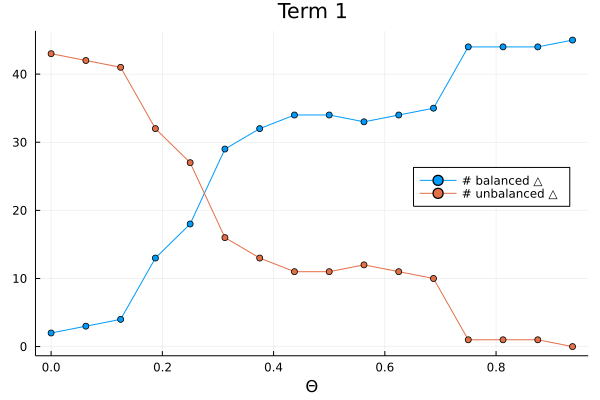

In [17]:
plot(ths, num_bal_triads[:, 1], markershape = :circle, label = "# balanced △", legend = :right)
plot!(ths, num_unbal_triads[:, 1], markershape = :circle, label = "# unbalanced △")
title!("Term 1")
xlabel!("Θ")

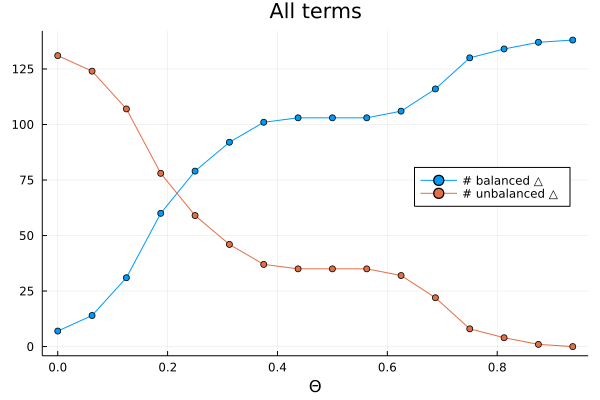

In [18]:

plot(ths, sum(num_bal_triads, dims = 2), markershape = :circle, label = "# balanced △", legend = :right)
plot!(ths, sum(num_unbal_triads, dims = 2), markershape = :circle, label = "# unbalanced △")
title!("All terms")
xlabel!("Θ")
# ylabel("")

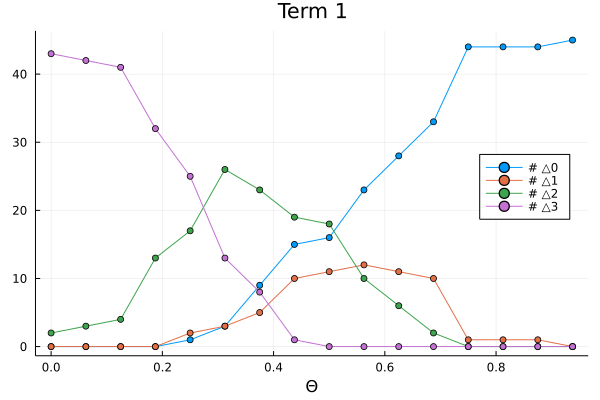

In [28]:
plot(ths, num_type_triads[:, 1, 1], markershape = :circle, label = "# △0", legend = :right)
plot!(ths, num_type_triads[:, 2, 1], markershape = :circle, label = "# △1")
plot!(ths, num_type_triads[:, 3, 1], markershape = :circle, label = "# △2")
plot!(ths, num_type_triads[:, 4, 1], markershape = :circle, label = "# △3")
title!("Term 1")
xlabel!("Θ")

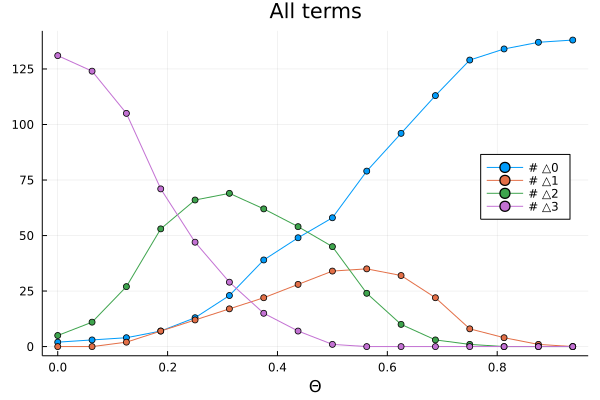

In [36]:
plot(ths, sum(num_type_triads[:, 1, :], dims = 2), markershape = :circle, label = "# △0", legend = :right)
plot!(ths, sum(num_type_triads[:, 2, :], dims = 2), markershape = :circle, label = "# △1")
plot!(ths, sum(num_type_triads[:, 3, :], dims = 2), markershape = :circle, label = "# △2")
plot!(ths, sum(num_type_triads[:, 4, :], dims = 2), markershape = :circle, label = "# △3")
title!("All terms")
xlabel!("Θ")

## Figures to the paper

In [43]:
p1 = plot(ths, sum(num_bal_triads, dims = 2), markershape = :circle, label = "# balanced △", legend = :right)
plot!(ths, sum(num_unbal_triads, dims = 2), markershape = :circle, label = "# unbalanced △")
# title!("All terms")
xlabel!("Θ")
# ylabel("")

plot!(windowsize = (250,300))

safesave(
        projectdir("plots", "bal_unbal_change.pdf"),
        p1
    )
    safesave(
        projectdir("plots", "bal_unbal_change.pdf"),
        p1
    )

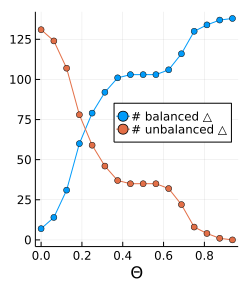

In [44]:
p1

In [46]:
p1 = plot(ths, sum(num_type_triads[:, 1, :], dims = 2), markershape = :circle, label = "# △0", legend = :right)
plot!(ths, sum(num_type_triads[:, 2, :], dims = 2), markershape = :circle, label = "# △1")
plot!(ths, sum(num_type_triads[:, 3, :], dims = 2), markershape = :circle, label = "# △2")
plot!(ths, sum(num_type_triads[:, 4, :], dims = 2), markershape = :circle, label = "# △3")
# title!("All terms")
xlabel!("Θ")

plot!(windowsize = (250,300))

safesave(
        projectdir("plots", "triad_type_change.pdf"),
        p1
    )
    safesave(
        projectdir("plots", "triad_type_change.pdf"),
        p1
    )

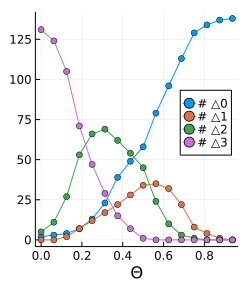

In [47]:
p1

## Triad types having simple edges

In [48]:
ord_attributes

Dict{Int64, Matrix{Float64}} with 6 entries:
  5 => [3.0 3.0 … 3.0 1.0; 3.0 3.0 … 3.0 2.0; … ; NaN NaN … NaN NaN; 1.0 3.0 … …
  4 => [3.0 3.0 … 3.0 1.0; 3.0 3.0 … 1.0 1.0; … ; 1.0 1.0 … 3.0 1.0; 1.0 3.0 … …
  6 => [NaN NaN … NaN NaN; 3.0 3.0 … 3.0 2.0; … ; NaN NaN … NaN NaN; NaN NaN … …
  2 => [NaN NaN … NaN NaN; 3.0 3.0 … 1.0 2.0; … ; NaN NaN … NaN NaN; NaN NaN … …
  3 => [3.0 3.0 … 3.0 1.0; 3.0 1.0 … 1.0 2.0; … ; NaN NaN … NaN NaN; NaN NaN … …
  1 => [3.0 3.0 … 3.0 1.0; 2.0 2.0 … 2.0 1.0; … ; NaN NaN … NaN NaN; NaN NaN … …

In [15]:
function get_simple_edge_polarizations(attr, opinion_nr)
    N, A = size(attr)
    # attrs = [attr[i, opinion_nr] for i in 1:N]
    
    polarities = zeros(N,N)
    for i in 1:N
        for j in i+1:N
            polarities[i,j] = (attr[i, opinion_nr] == attr[j, opinion_nr])*2-1
            polarities[j,i] = polarities[i,j]
        end
    end
    return polarities
end

get_simple_edge_polarizations (generic function with 1 method)

In [16]:
opinion_nrs = 1:8

num_bal_triads_sim = zeros(8, 6)
num_unbal_triads_sim = zeros(8, 6)

num_type_triads_sim = zeros(8, 4, 6)

for opinion_nr in opinion_nrs
    
    all_signs = [get_simple_edge_polarizations(ord_attributes[i], opinion_nr) for i in 1:6]

    for sem in 1:6
        for triad in all_triads[sem]
            is_bal, triad_type = get_triad_type(triad, all_signs[sem])
            num_bal_triads_sim[opinion_nr, sem] += is_bal
            num_unbal_triads_sim[opinion_nr, sem] += 1-is_bal

            num_type_triads_sim[opinion_nr, triad_type + 1, sem] += 1
        end
    end
end


In [74]:
num_bal_triads_sim

8×6 Matrix{Float64}:
 39.0  23.0  8.0  24.0  18.0  11.0
 37.0  21.0  8.0  19.0  16.0  12.0
 30.0  19.0  4.0  19.0  15.0   9.0
 36.0  26.0  7.0  25.0  16.0  11.0
 40.0  25.0  9.0  23.0  18.0  12.0
 34.0  26.0  9.0  23.0  17.0  11.0
 37.0  21.0  7.0  22.0  16.0  10.0
 44.0  25.0  9.0  23.0  17.0  11.0

In [75]:
num_unbal_triads_sim

8×6 Matrix{Float64}:
  6.0  3.0  1.0  2.0  2.0  1.0
  8.0  5.0  1.0  7.0  4.0  0.0
 15.0  7.0  5.0  7.0  5.0  3.0
  9.0  0.0  2.0  1.0  4.0  1.0
  5.0  1.0  0.0  3.0  2.0  0.0
 11.0  0.0  0.0  3.0  3.0  1.0
  8.0  5.0  2.0  4.0  4.0  2.0
  1.0  1.0  0.0  3.0  3.0  1.0

In [42]:
ord_list_of_attributes
labels = ["abortion", "death\npenalty", "euthanasia", "gay\nmarriage", "homosexual", "marijuana", "political", "premarital\nsex"]

8-element Vector{String}:
 "abortion"
 "death\npenalty"
 "euthanasia"
 "gay\nmarriage"
 "homosexual"
 "marijuana"
 "political"
 "premarital\nsex"

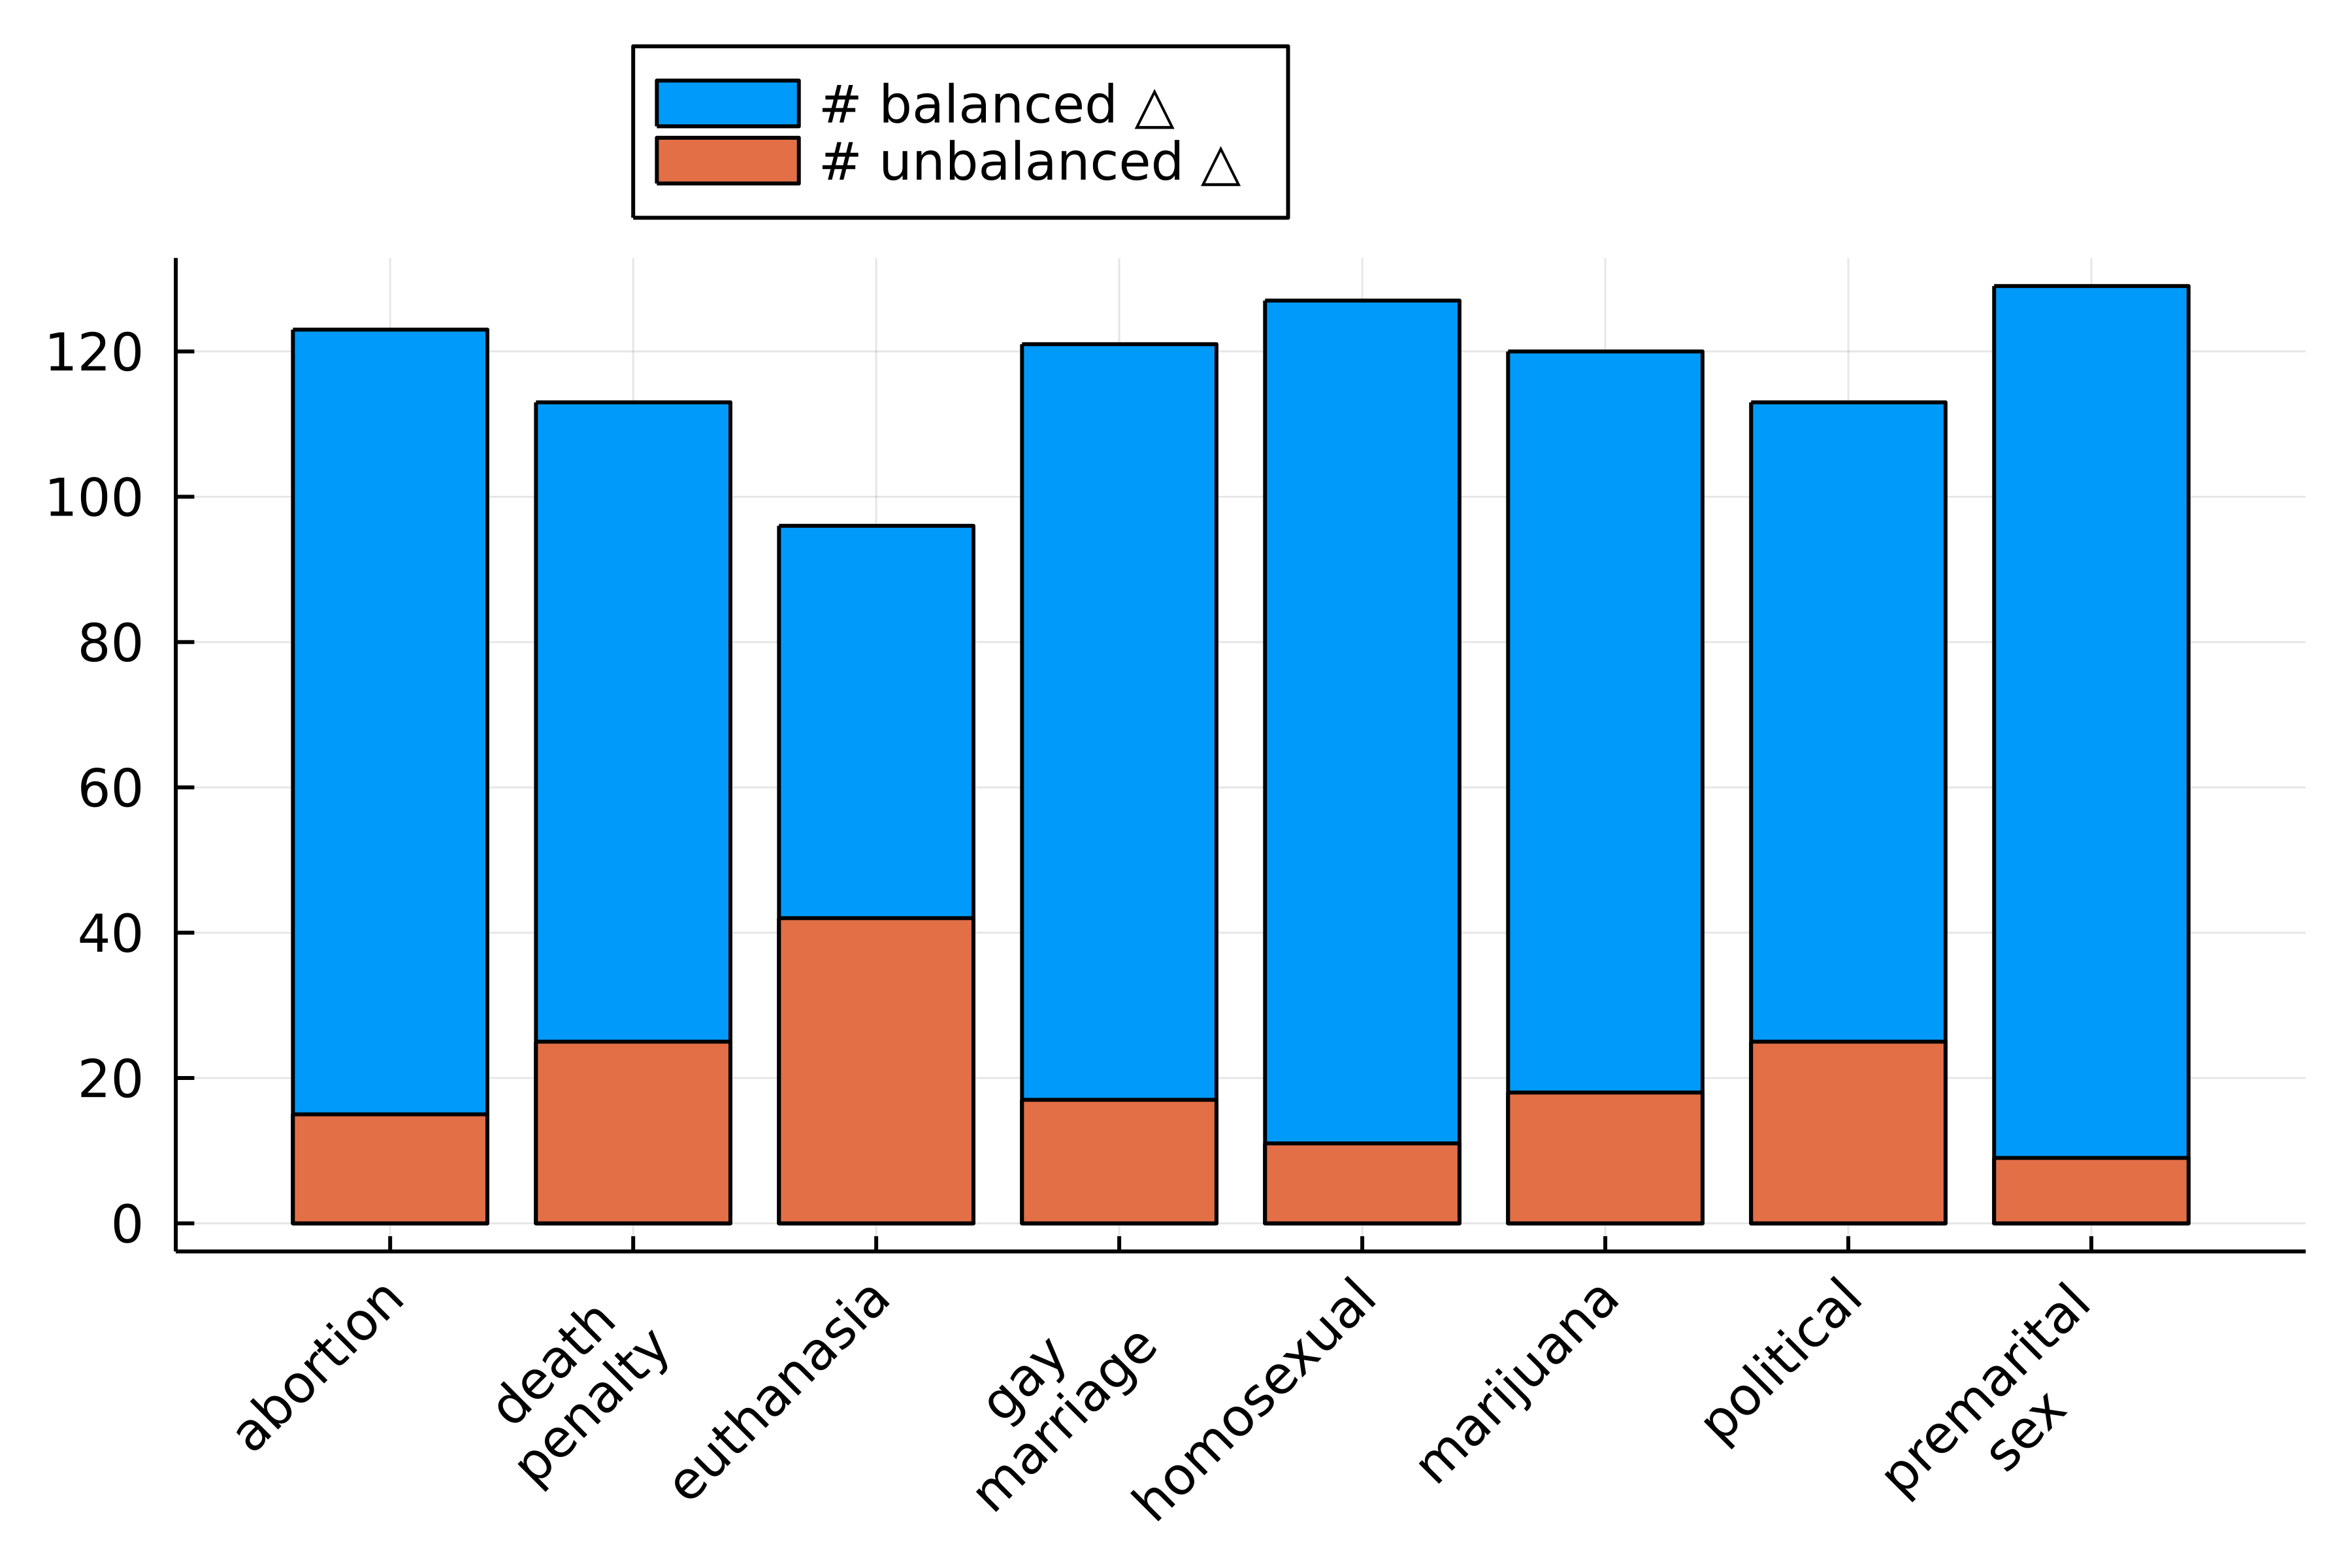

In [102]:
using Plots.PlotMeasures

p1 = bar(labels, sum(num_bal_triads_sim, dims = 2), xrotation = 45, bottom_margin = 5mm, dpi = 600, label = "# balanced △", legend = :outertop)
bar!(labels, sum(num_unbal_triads_sim, dims = 2), label = "# unbalanced △")
# title!("All terms")
# xlabel!("Θ")
# ylabel("")
Plots.scalefontsizes()
Plots.scalefontsizes(1.1)
# plot!(windowsize = (250,300))

# safesave(
#         projectdir("plots", "bal_unbal_change.pdf"),
#         p1
#     )
#     safesave(
#         projectdir("plots", "bal_unbal_change.pdf"),
#         p1
#     )
p1

In [112]:
sum(num_type_triads_sim[:, 2, :], dims=2)

#no triads with 1 neg edge. That's correct. 

8×1 Matrix{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [17]:
p1 = bar(labels, sum(num_type_triads_sim[:, 3, :], dims = 2), xrotation = 45, bottom_margin = 5mm, dpi = 600, label = "# △2", legend = :right)#, bar_position = :stack)
bar!(labels, sum(num_type_triads_sim[:, 1, :], dims = 2), label = "# △0")
bar!(labels, sum(num_type_triads_sim[:, 4, :], dims = 2), label = "# △3")
# plot!(ths, sum(num_type_triads[:, 3, :], dims = 2), markershape = :circle, label = "# △2")
# plot!(ths, sum(num_type_triads[:, 4, :], dims = 2), markershape = :circle, label = "# △3")
# title!("All terms")
# xlabel!("Θ")

# plot!(windowsize = (250,300))

# safesave(
#         projectdir("plots", "triad_type_change.pdf"),
#         p1
#     )
#     safesave(
#         projectdir("plots", "triad_type_change.pdf"),
#         p1
#     )

UndefVarError: UndefVarError: mm not defined

In [28]:
num_type_sums = sum(num_type_triads_sim[:, :, :], dims = 3)
num_type_sums = num_type_sums[:, [1,3,4]]

tbl = height = 

8×3 Matrix{Float64}:
 40.0  83.0  15.0
 39.0  74.0  25.0
 16.0  80.0  42.0
 28.0  93.0  17.0
 50.0  77.0  11.0
 41.0  79.0  18.0
 29.0  84.0  25.0
 49.0  80.0   9.0

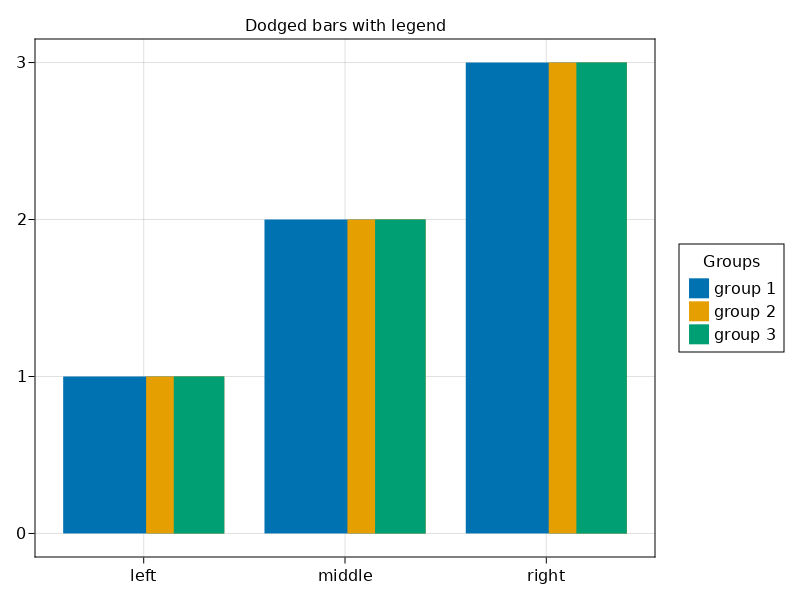

In [34]:
colors = Makie.wong_colors()

fig = Figure()
ax = Axis(fig[1,1], xticks = (1:3, ["left", "middle", "right"]),
        title = "Dodged bars with legend")

# Plot
x1 = [1,2, 3]
h = [1,2,3]
d1 = [1,1,1]

barplot!(ax, x1, h,
        dodge = d1,
        color = colors[d1])

barplot!(ax, x1, h,
        dodge = d1 .+ 1,
        color = colors[d1 .+ 1])

barplot!(ax, x1, h,
        dodge = d1 .+ 2,
        color = colors[d1 .+ 2])

# Legend
labels = ["group 1", "group 2", "group 3"]
elements = [PolyElement(polycolor = colors[i]) for i in 1:length(labels)]
title = "Groups"

Legend(fig[1,2], elements, labels, title)

fig

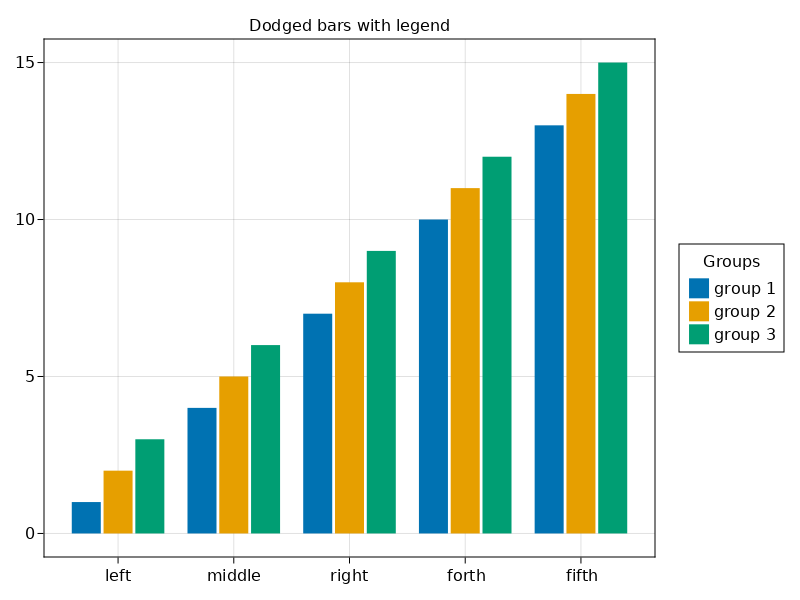

In [39]:
colors = Makie.wong_colors()

fig = Figure()
ax = Axis(fig[1,1], xticks = (1:5, ["left", "middle", "right", "forth", "fifth"]),
        title = "Dodged bars with legend")

# Plot
x = zeros(Int, 3,5)
x .= repeat([1,2,3,4,5],1,3)'
h = zeros(3,5)
h[:] .= [1:15...]
d = repeat([1;2;3],1,5)

barplot!(ax, x[:], h[:],
        dodge = d[:],
        color = colors[d[:]])

# barplot!(ax, x1, h,
#         dodge = d1 .+ 1,
#         color = colors[d1 .+ 1])

# barplot!(ax, x1, h,
#         dodge = d1 .+ 2,
#         color = colors[d1 .+ 2])

# Legend
labels = ["group 1", "group 2", "group 3"]
elements = [PolyElement(polycolor = colors[i]) for i in 1:length(labels)]
title = "Groups"

Legend(fig[1,2], elements, labels, title)

fig

In [41]:
num_type_sums'

3×8 adjoint(::Matrix{Float64}) with eltype Float64:
 40.0  39.0  16.0  28.0  50.0  41.0  29.0  49.0
 83.0  74.0  80.0  93.0  77.0  79.0  84.0  80.0
 15.0  25.0  42.0  17.0  11.0  18.0  25.0   9.0

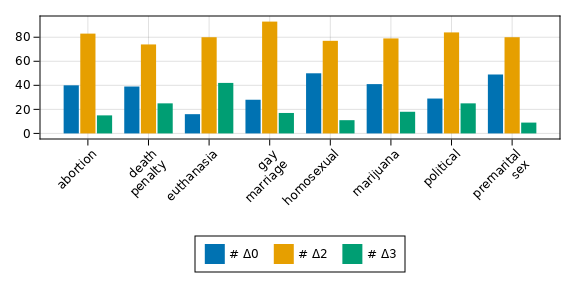

In [77]:
colors = Makie.wong_colors()

size_inches = (8, 4)
size_pt = 72 .* size_inches
fig = Figure(resolution = size_pt, fontsize = 12)
ax = Axis(fig[1,1], xticks = (1:8, labels), xticklabelrotation = pi/4.)

# Plot
x = zeros(Int, 3,8)
x .= repeat([1:8...],1,3)'
h = zeros(3,8)
h .= num_type_sums'
d = repeat([1;2;3],1,8)

barplot!(ax, x[:], h[:],
        dodge = d[:],
        color = colors[d[:]])

# barplot!(ax, x1, h,
#         dodge = d1 .+ 1,
#         color = colors[d1 .+ 1])

# barplot!(ax, x1, h,
#         dodge = d1 .+ 2,
#         color = colors[d1 .+ 2])

# Legend
glabels = ["# Δ0", "# Δ2", "# Δ3"]
elements = [PolyElement(polycolor = colors[i]) for i in 1:length(glabels)]
# title = "Groups"

Legend(fig[2,1], elements, glabels, orientation = :horizontal)


safesave(
        projectdir("plots", "triad_type_change_simple.pdf"),
        fig
    )
#     safesave(
#         projectdir("plots", "triad_type_change_simple.pdf"),
#         fig
#     )

fig

In [64]:
num_bal_sums = sum(num_bal_triads_sim, dims = 2)
num_unbal_sums = sum(num_unbal_triads_sim, dims = 2)

num_sums = [num_bal_sums num_unbal_sums]

8×2 Matrix{Float64}:
 123.0  15.0
 113.0  25.0
  96.0  42.0
 121.0  17.0
 127.0  11.0
 120.0  18.0
 113.0  25.0
 129.0   9.0

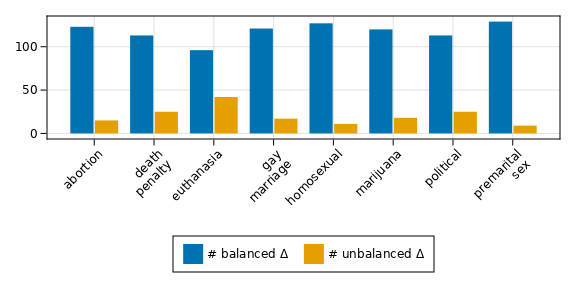

In [78]:
colors = Makie.wong_colors()

size_inches = (8, 4)
size_pt = 72 .* size_inches
fig = Figure(resolution = size_pt, fontsize = 12)
ax = Axis(fig[1,1], xticks = (1:8, labels), xticklabelrotation = pi/4.)

# Plot
x = zeros(Int, 8,2)
x .= repeat([1:8...],1,2)
h = num_sums
d = repeat([1;2],1,8)'

barplot!(ax, x[:], h[:],
        dodge = d[:],
        color = colors[d[:]])

# Legend
glabels = ["# balanced Δ", "# unbalanced Δ"]
elements = [PolyElement(polycolor = colors[i]) for i in 1:length(glabels)]
# title = "Groups"

Legend(fig[2, 1], elements, glabels, orientation = :horizontal)

safesave(
        projectdir("plots", "bal_unbal_simple.pdf"),
        fig
    )

fig